In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

#%config InlineBackend.figure_format = 'svg'
#%config InlineBackend.figure_format = 'pdf'

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import os
import autograd.numpy as np
import scipy.stats as stats
import torch
import tensorflow as tf

In [3]:
import kbrgan
import kbrgan.glo as glo
import kbrgan.imutil as imutil
import kbrgan.util as util

## Load dataframe file

In [4]:
df = pd.read_pickle(glo.share_path('dataframe_results','face_n1_vgglayers_lr'))

## Display images in a dataframe

In [5]:
# https://www.kaggle.com/stassl/displaying-inline-images-in-pandas-dataframe
import base64
import io
import PIL
import IPython
import skimage

# def get_thumbnail(path):
#     im = PIL.Image.open(path)
#     im.thumbnail((150, 150), Image.LANCZOS)
#     return im

def image_base64(im, resize=224):
    '''
    im: a numpy array whose range is [0,1]
    '''
    with io.BytesIO() as buffer:
        # resize
        im = skimage.transform.resize(im, (resize, resize), mode='reflect', anti_aliasing=True)
        
        # convert the numpy array to a PIL image
        pil_im = PIL.Image.fromarray(np.uint8(im*255))
        pil_im.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()

def images_formatter(imgs,col=2):
    if len(imgs) < col:
        html = u'<div class="df">'
    else:
        html = u'<div class="df" style="width: 400px">'
    for i in range(len(imgs)):
        html += '<div class="imgs" style="display: inline-block; width: 128px">'
        img64 = image_base64(imgs[i])
#         print(img64)
        img_tag = '<img src="data:image/jpeg;base64,{}" >'.format(img64)
#         img_tag = f'<img src="data:image/jpeg;base64,{img64}">'
        html += img_tag + ' </div> '
    
        if (i+1)%col == 0:
            html += '<br>'
#     print(html)
    return html +'</div>'



In [6]:
df.columns.values

array(['cond_feat', 'cond_imgs', 'cond_path', 'depth_process', 'device',
       'extractor_layers', 'extractor_type', 'feat_imgs', 'g_max',
       'g_min', 'g_path', 'g_type', 'img_log_steps', 'img_size',
       'ini_imgs', 'iteration', 'kernel', 'kparams', 'logdir', 'lr',
       'n_opt_iter', 'n_sample', 'out_imgs', 'seed', 'texture', 'w_input',
       'zpen'], dtype=object)

In [7]:
#filter parameters to show
df = df[['cond_imgs','out_imgs','lr','extractor_layers','iteration','img_size','extractor_type','cond_path']] 


,cond_imgs,out_imgs,lr,extractor_layers,iteration,img_size,extractor_type,cond_path
0,,,0.005,['17'],2999,224,vgg_face,/notebooks/psangkloy3/gdrive/condgan_share/face_train_list/files_n1_5.txt
1,,,0.005,['17'],2999,224,vgg_face,/notebooks/psangkloy3/gdrive/condgan_share/face_train_list/files_n1_2.txt
2,,,0.005,['35'],2999,224,vgg_face,/notebooks/psangkloy3/gdrive/condgan_share/face_train_list/files_n1_1.txt
3,,,0.005,['26'],2999,224,vgg_face,/notebooks/psangkloy3/gdrive/condgan_share/face_train_list/files_n1_3.txt
4,,,0.005,['26'],2999,224,vgg_face,/notebooks/psangkloy3/gdrive/condgan_share/face_train_list/files_n1_4.txt
5,,,0.05,['26'],2999,224,vgg_face,/notebooks/psangkloy3/gdrive/condgan_share/face_train_list/files_n1_2.txt
6,,,0.05,['26'],2999,224,vgg_face,/notebooks/psangkloy3/gdrive/condgan_share/face_train_list/files_n1_3.txt
7,,,0.05,['26'],2999,224,vgg_face,/notebooks/psangkloy3/gdrive/condgan_share/face_train_list/files_n1_4.txt
8,,,0.05,['26'],2999,224,vgg_face,/notebooks/psangkloy3/gdrive/condgan_share/face_train_list/files_n1_5.txt
9,,,0.005,['35'],2999,224,vgg_face,/notebooks/psangkloy3/gdrive/condgan_share/face_train_list/files_n1_5.txt

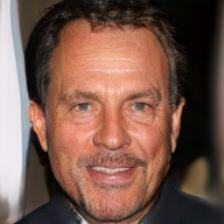
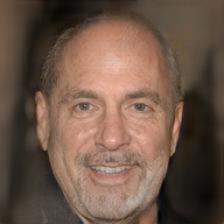
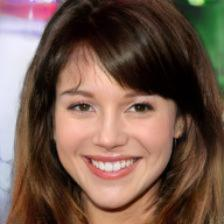
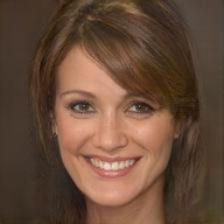
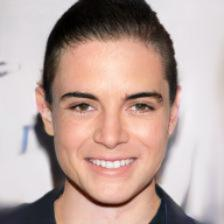
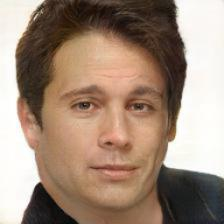
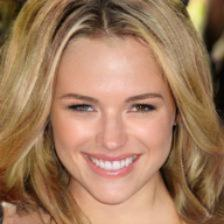
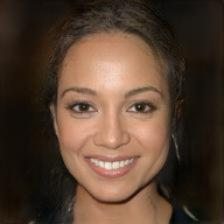
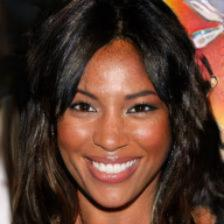
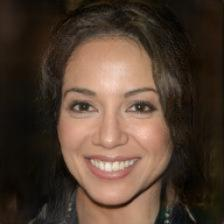
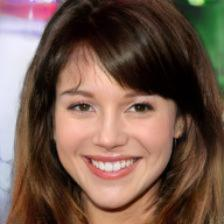
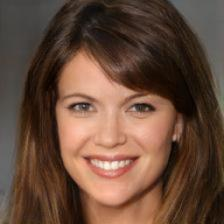
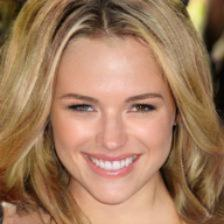
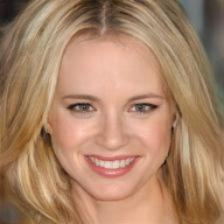
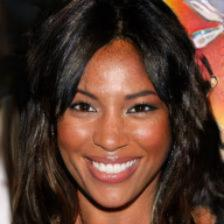
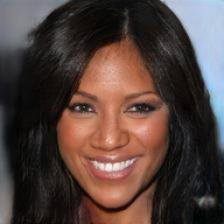
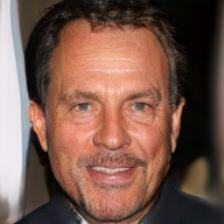
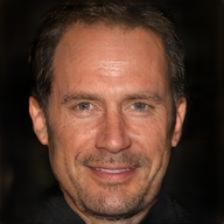
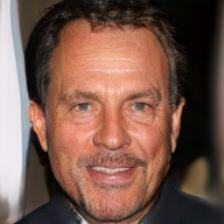
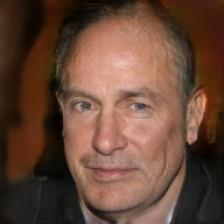
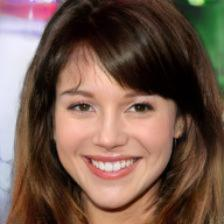
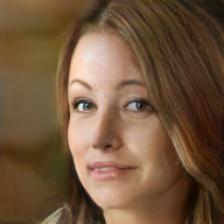
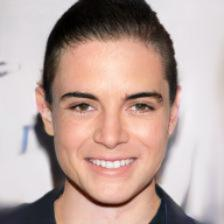
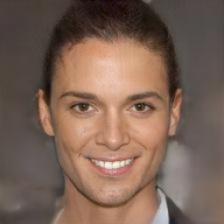
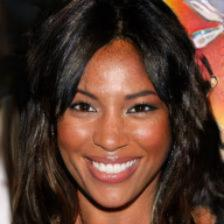
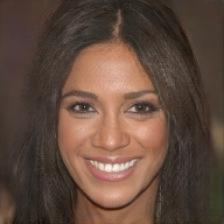
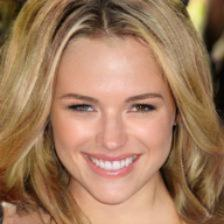
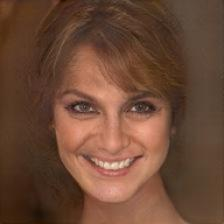
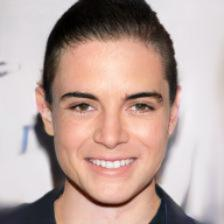
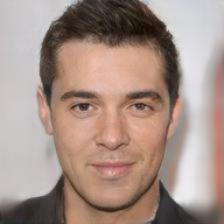
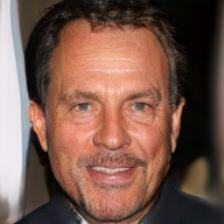
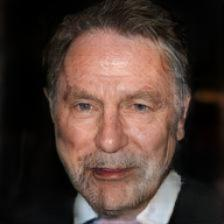
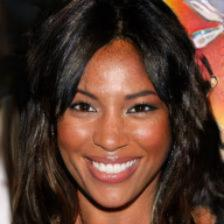
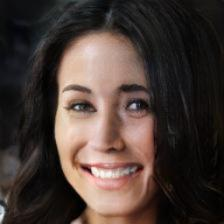
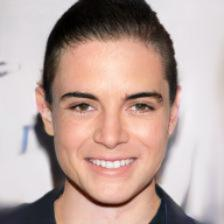
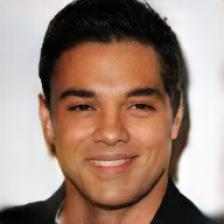
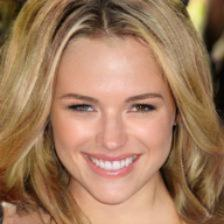
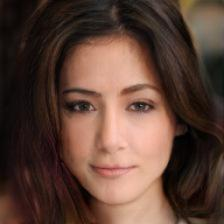
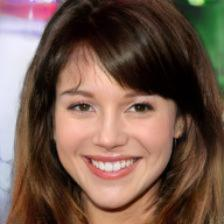
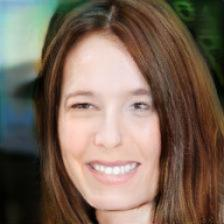
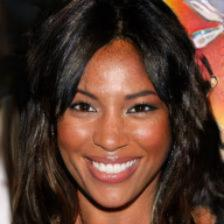
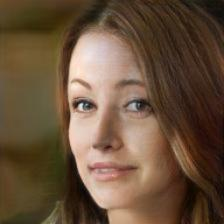
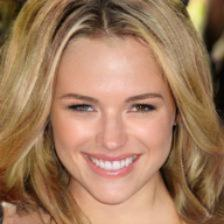
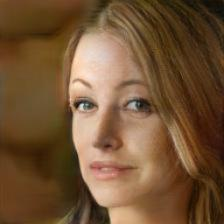
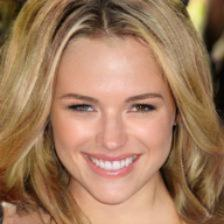
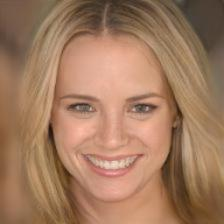
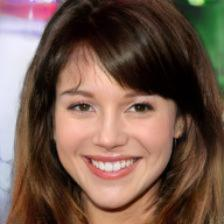
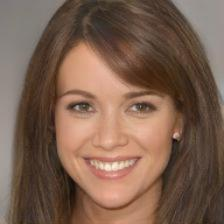
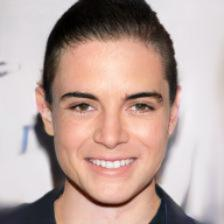
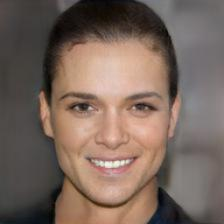
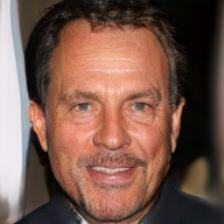
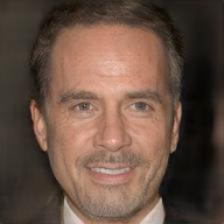
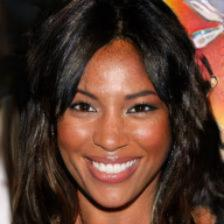
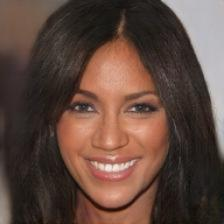
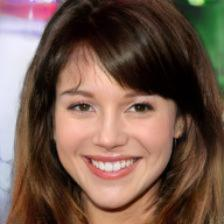
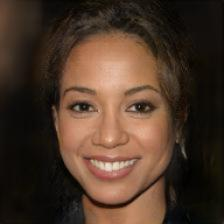
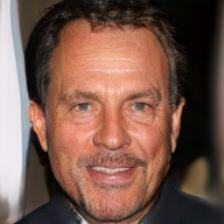
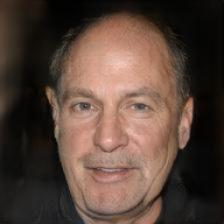
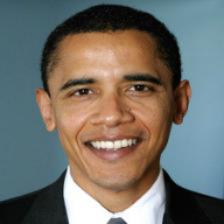
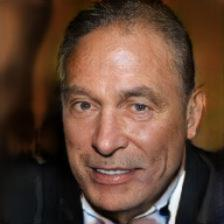
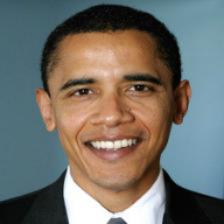
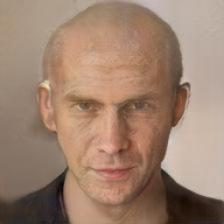
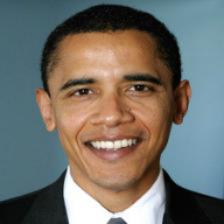
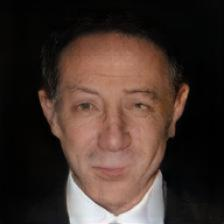
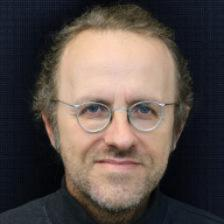
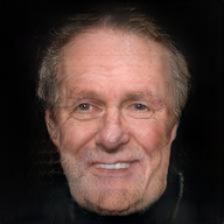
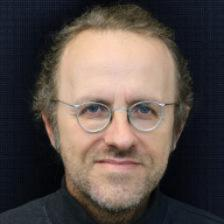
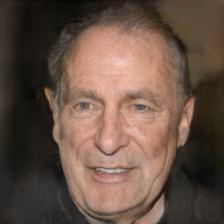
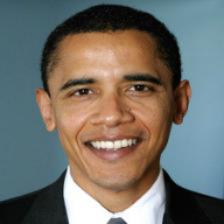
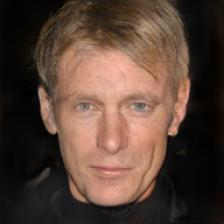
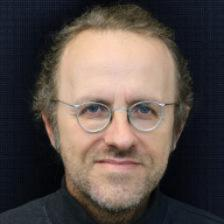
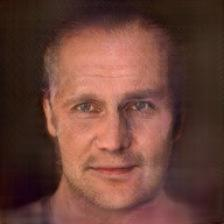
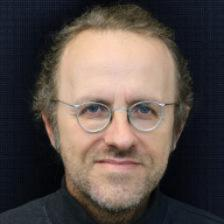
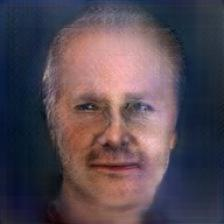
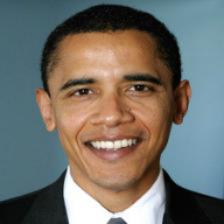
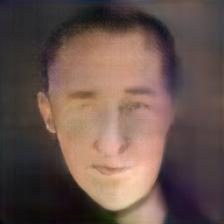
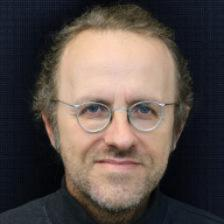
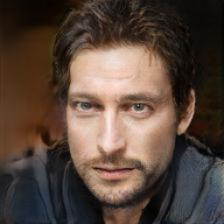
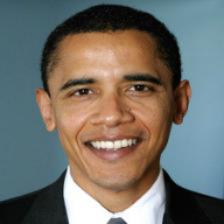
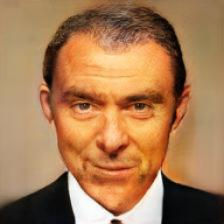
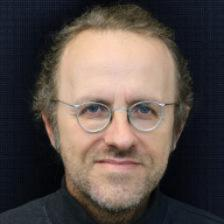
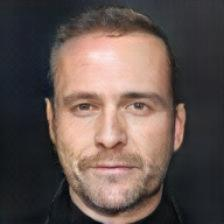

In [8]:
# dataframe to html
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', -1)
html = df.to_html(formatters={'cond_imgs': images_formatter, 'out_imgs': images_formatter,'feat_imgs': images_formatter,'cond_feat': images_formatter}, escape=False)
IPython.display.HTML(html)

In [9]:
#do some filtering based on parameters, you can google dataframe querying for a more advance usage
df_final = df

#filter from parameter value, can also use &
df_final = df_final.loc[df_final['cond_path']=='/notebooks/psangkloy3/gdrive/condgan_share/face_train_list/files_n1_3.txt']
df_final = df_final.loc[df_final['lr']=='0.05']
df_final = df_final.loc[(df_final['extractor_layers']=="['35']") | (df_final['extractor_layers']=="['17']" )]


,cond_imgs,out_imgs,lr,extractor_layers,iteration,img_size,extractor_type,cond_path
18,,,0.05,['35'],2999,224,vgg_face,/notebooks/psangkloy3/gdrive/condgan_share/face_train_list/files_n1_3.txt
22,,,0.05,['17'],2999,224,vgg_face,/notebooks/psangkloy3/gdrive/condgan_share/face_train_list/files_n1_3.txt

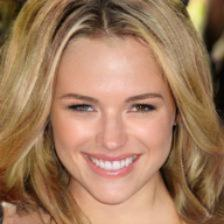
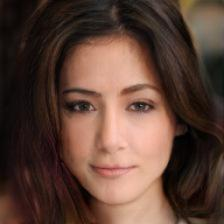
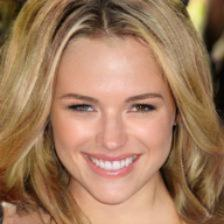
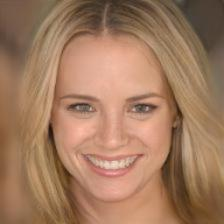

In [10]:
# dataframe to html
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', -1)
html = df_final.to_html(formatters={'cond_imgs': images_formatter, 'out_imgs': images_formatter,'feat_imgs': images_formatter,'cond_feat': images_formatter}, escape=False)
IPython.display.HTML(html)

In [181]:
len(html)

185346

In [694]:
#save results to html file
with open('bird_hed.html','w+') as f:
    f.write(html)